<h1 style = "font-size:3rem;color:orange">Saratoga Houses</h1>

- https://github.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/blob/master/data/SaratogaHouses.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from fitter import Fitter


In [2]:
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/"
    "master/data/SaratogaHouses.csv"
)
data = pd.read_csv(url, sep=',')

data.columns = ['precio', 'metros_totales', 'antiguedad', 'precio_terreno', 'metros_habitables',
                'universitarios', 'dormitorios', 'chimenea', 'banyos', 'habitaciones', 'calefaccion',
                'consumo_calefaccion', 'desague', 'vistas_lago', 'nueva_construccion', 'aire_acondicionado']

In [3]:
display(data.sample(8))
print("\nDimensiones:", data.shape)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
217,134800,0.48,73,20500,1384,52,3,0,2.0,5,hot air,oil,septic,No,No,No
1429,293000,1.94,5,110000,2111,40,3,1,2.0,9,hot air,gas,septic,No,No,Yes
19,87500,0.88,17,19400,1092,35,3,0,1.0,6,hot air,oil,septic,No,No,No
756,174000,0.46,34,5500,2106,38,5,0,2.0,11,hot air,gas,septic,No,No,No
721,179000,0.46,44,70200,864,57,2,0,1.0,7,hot air,gas,public/commercial,No,No,No
1480,182000,0.38,36,3300,1729,36,4,1,1.5,8,hot water/steam,gas,septic,No,No,No
165,144900,0.10,14,26000,1677,64,3,1,2.5,5,hot air,gas,public/commercial,No,No,Yes
662,133000,0.42,36,60200,1279,57,3,1,1.0,4,hot air,gas,public/commercial,No,No,No



Dimensiones: (1728, 16)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               1728 non-null   int64  
 1   metros_totales       1728 non-null   float64
 2   antiguedad           1728 non-null   int64  
 3   precio_terreno       1728 non-null   int64  
 4   metros_habitables    1728 non-null   int64  
 5   universitarios       1728 non-null   int64  
 6   dormitorios          1728 non-null   int64  
 7   chimenea             1728 non-null   int64  
 8   banyos               1728 non-null   float64
 9   habitaciones         1728 non-null   int64  
 10  calefaccion          1728 non-null   object 
 11  consumo_calefaccion  1728 non-null   object 
 12  desague              1728 non-null   object 
 13  vistas_lago          1728 non-null   object 
 14  nueva_construccion   1728 non-null   object 
 15  aire_acondicionado   1728 non-null   o

In [5]:
print(data.isna().sum())

precio                 0
metros_totales         0
antiguedad             0
precio_terreno         0
metros_habitables      0
universitarios         0
dormitorios            0
chimenea               0
banyos                 0
habitaciones           0
calefaccion            0
consumo_calefaccion    0
desague                0
vistas_lago            0
nueva_construccion     0
aire_acondicionado     0
dtype: int64


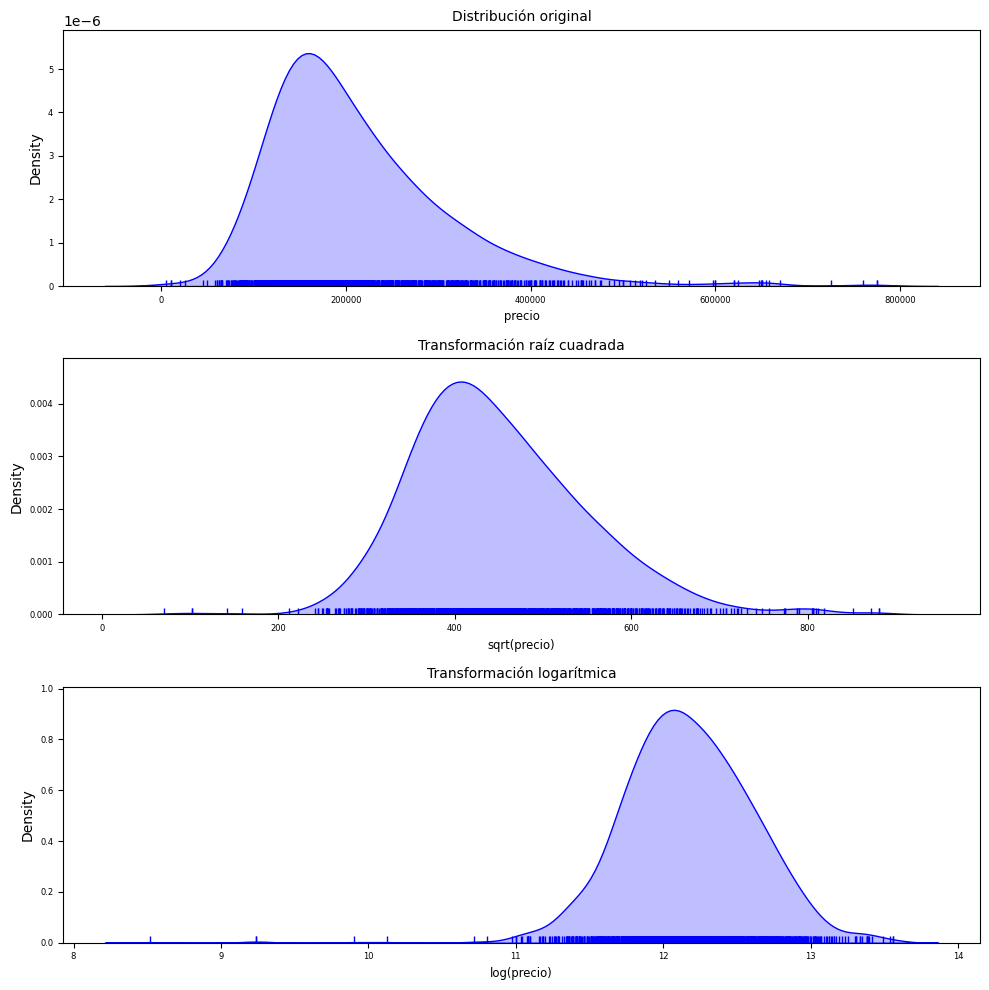

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
sns.kdeplot(
    data.precio,
    fill=True,
    color='blue',
    ax=axes[0]
)
sns.rugplot(
    data.precio,
    color='blue',
    ax=axes[0]
)
axes[0].set_title('Distribución original', fontsize='medium')
axes[0].set_xlabel('precio', fontsize='small')
axes[0].tick_params(labelsize=6)

sns.kdeplot(
    np.sqrt(data.precio),
    fill=True,
    color='blue',
    ax=axes[1]
)
sns.rugplot(
    np.sqrt(data.precio),
    color='blue',
    ax=axes[1]
)
axes[1].set_title('Transformación raíz cuadrada', fontsize='medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small')
axes[1].tick_params(labelsize=6)

sns.kdeplot(
    np.log(data.precio),
    fill=True,
    color='blue',
    ax=axes[2]
)
sns.rugplot(
    np.log(data.precio),
    color='blue',
    ax=axes[2]
)
axes[2].set_title('Transformación logarítmica', fontsize='medium')
axes[2].set_xlabel('log(precio)', fontsize='small')
axes[2].tick_params(labelsize=6)

fig.tight_layout()

In [7]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(data.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

2024-03-17 23:14:00.509 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-17 23:14:00.517 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-17 23:14:00.562 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted logistic distribution with error=0.0)
2024-03-17 23:14:00.600 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.0)
2024-03-17 23:14:00.634 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-03-17 23:14:00.783 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)
2024-03-17 23:14:00.824 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-03-17 23:14:00.839 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,3090.671453,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,3158.876482,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,2967.579133,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,3331.926300,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,3335.443598,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,2835.012600,inf,0.316530,2.028906e-154
powerlaw,3.132284e-10,2728.809479,2745.173639,inf,0.344929,3.981254e-184
exponpow,4.841645e-10,inf,inf,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,inf,3.958212,0.947917,0.000000e+00


In [8]:
data.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


Text(0.5, 0.98, 'Distribución variables numéricas')

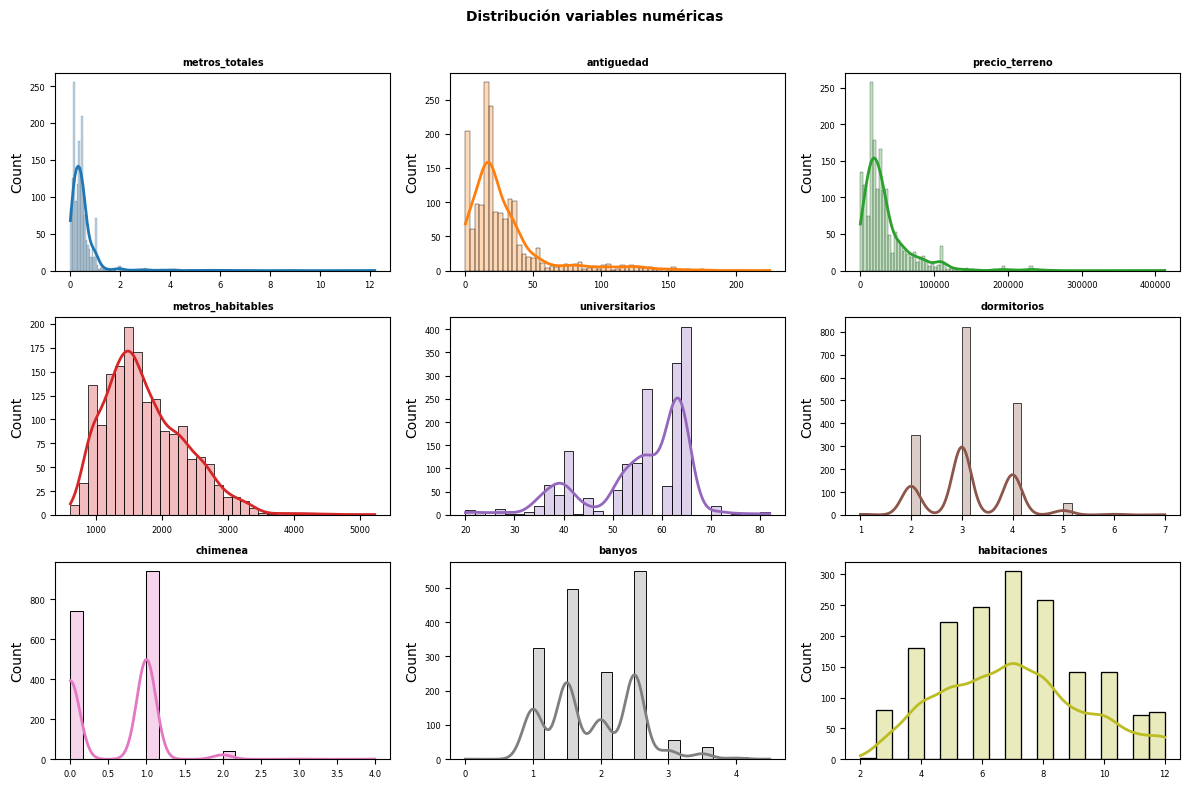

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data=data,
        x=column,
        stat='count',
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(column, fontsize=7, fontweight='bold')
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight='bold')

In [10]:
data.chimenea.value_counts()

chimenea
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64

In [11]:
data.chimenea = data.chimenea.astype('str')

Text(0.5, 0.98, 'Distribución variables numéricas')

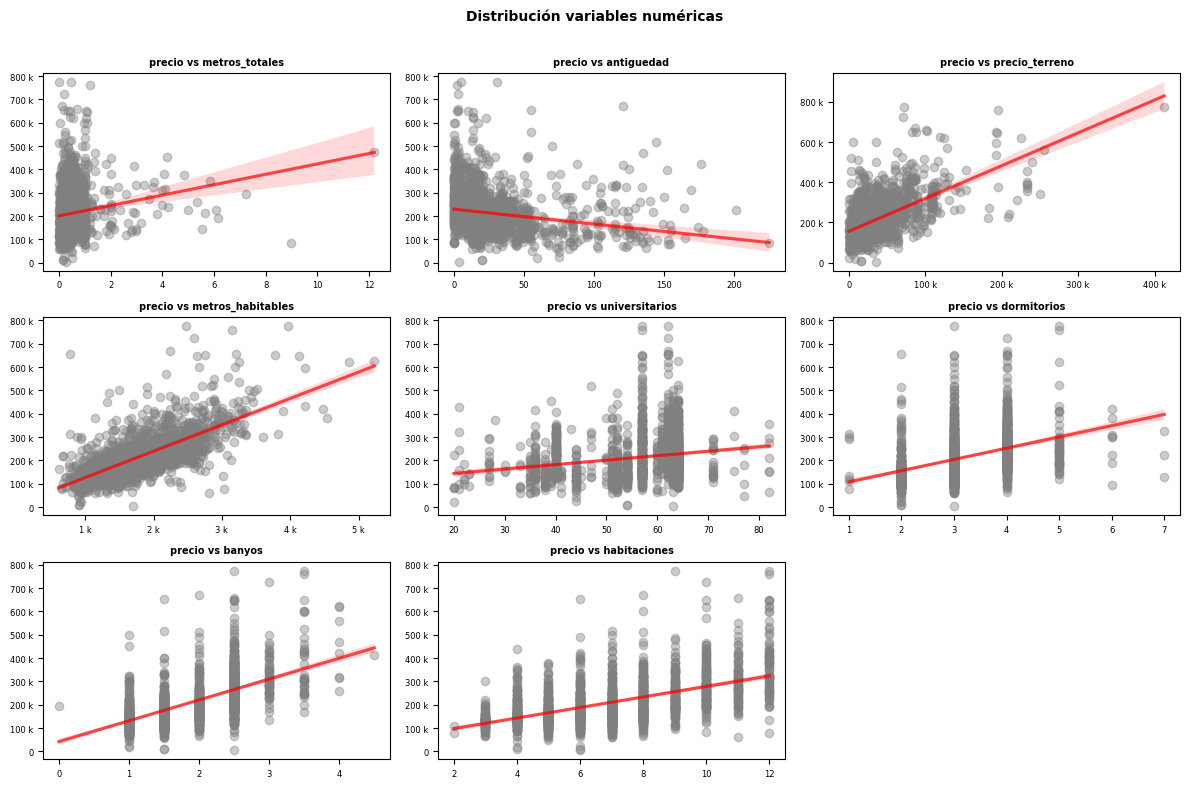

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, column in enumerate(columnas_numeric):
    sns.regplot(
        x=data[column],
        y=data['precio'],
        color='gray',
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'r', 'alpha': 0.7},
        ax=axes[i]
    )
    axes[i].set_title(f"precio vs {column}", fontsize=7, fontweight='bold')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in [8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight='bold')

In [13]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return corr_mat

corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
44,metros_habitables,habitaciones,0.733666,0.733666
76,habitaciones,metros_habitables,0.733666,0.733666
67,banyos,metros_habitables,0.718564,0.718564
43,metros_habitables,banyos,0.718564,0.718564
36,metros_habitables,precio,0.712390,0.712390
4,precio,metros_habitables,0.712390,0.712390
78,habitaciones,dormitorios,0.671863,0.671863
62,dormitorios,habitaciones,0.671863,0.671863
42,metros_habitables,dormitorios,0.656196,0.656196
58,dormitorios,metros_habitables,0.656196,0.656196


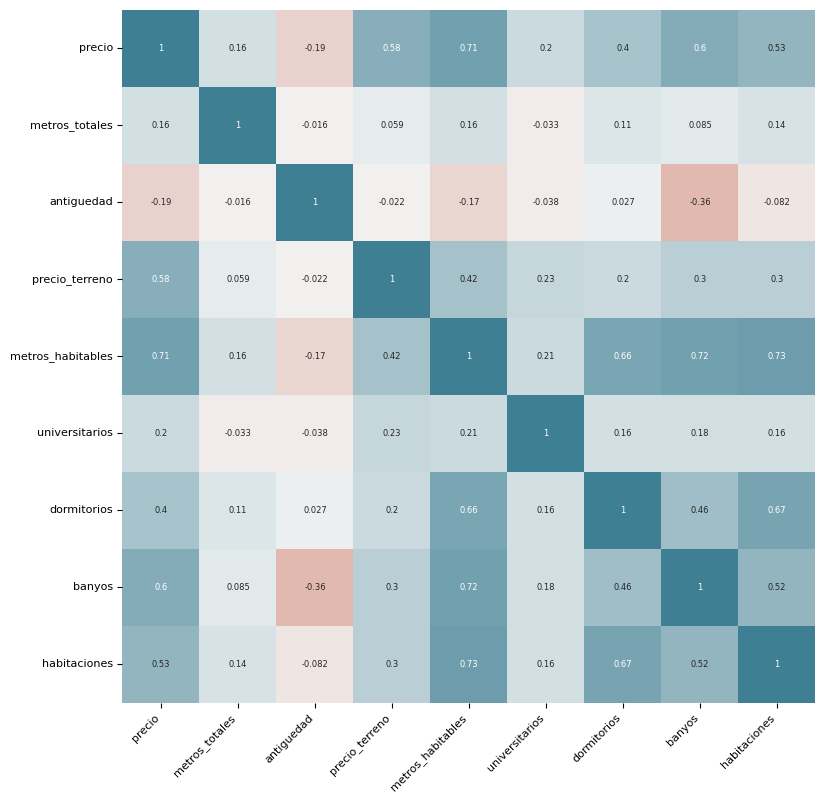

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={'size': 6},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.tick_params(labelsize=8)

In [15]:
data.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


Text(0.5, 0.98, 'Distribución variables cualitativas')

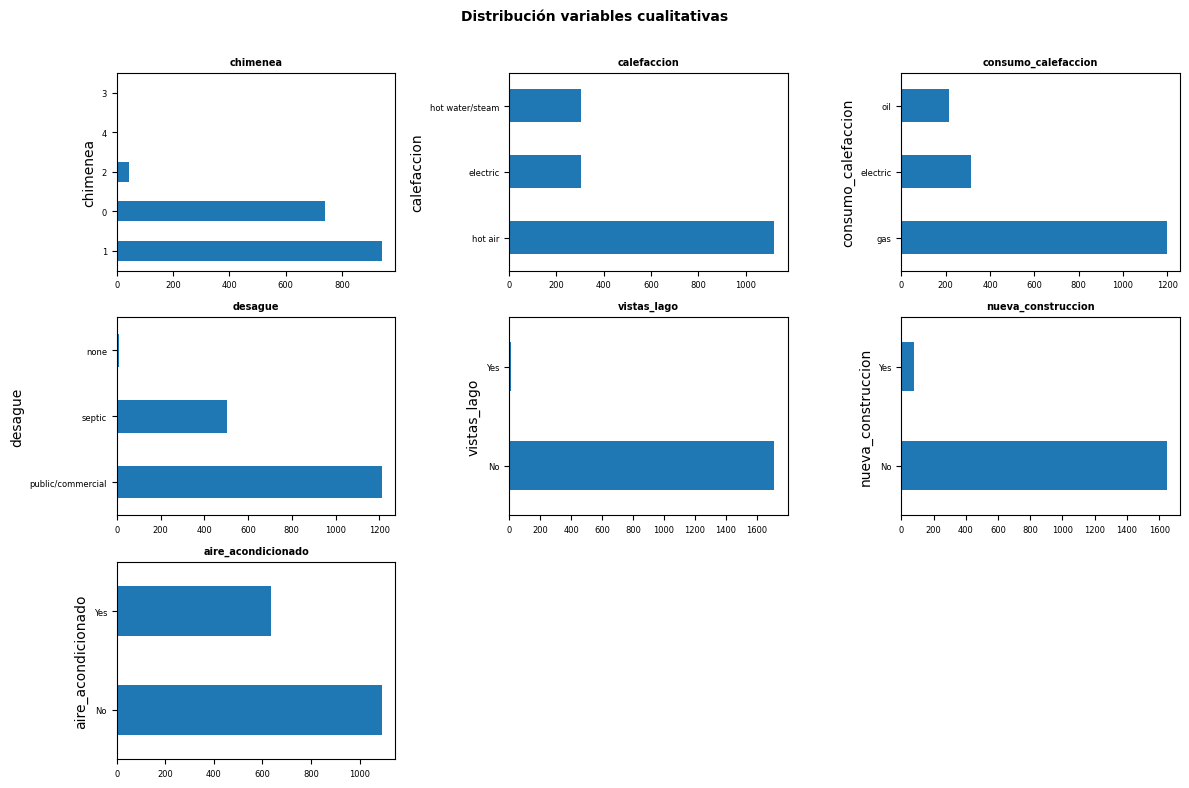

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, column in enumerate(columnas_object):
    data[column].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(column, fontsize=7, fontweight='bold')
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')

for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas', fontsize=10, fontweight='bold')

In [17]:
data.chimenea.value_counts().sort_index()

chimenea
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64

In [18]:
dic_replace = {'2': '2_mas',
               '3': '2_mas',
               '4': '2_mas'}

data['chimenea'] = (
    data['chimenea']
    .map(dic_replace)
    .fillna(data['chimenea'])
)

In [19]:
data.chimenea.value_counts().sort_index()

chimenea
0        740
1        942
2_mas     46
Name: count, dtype: int64

Text(0.5, 0.98, 'Distribución variables numéricas')

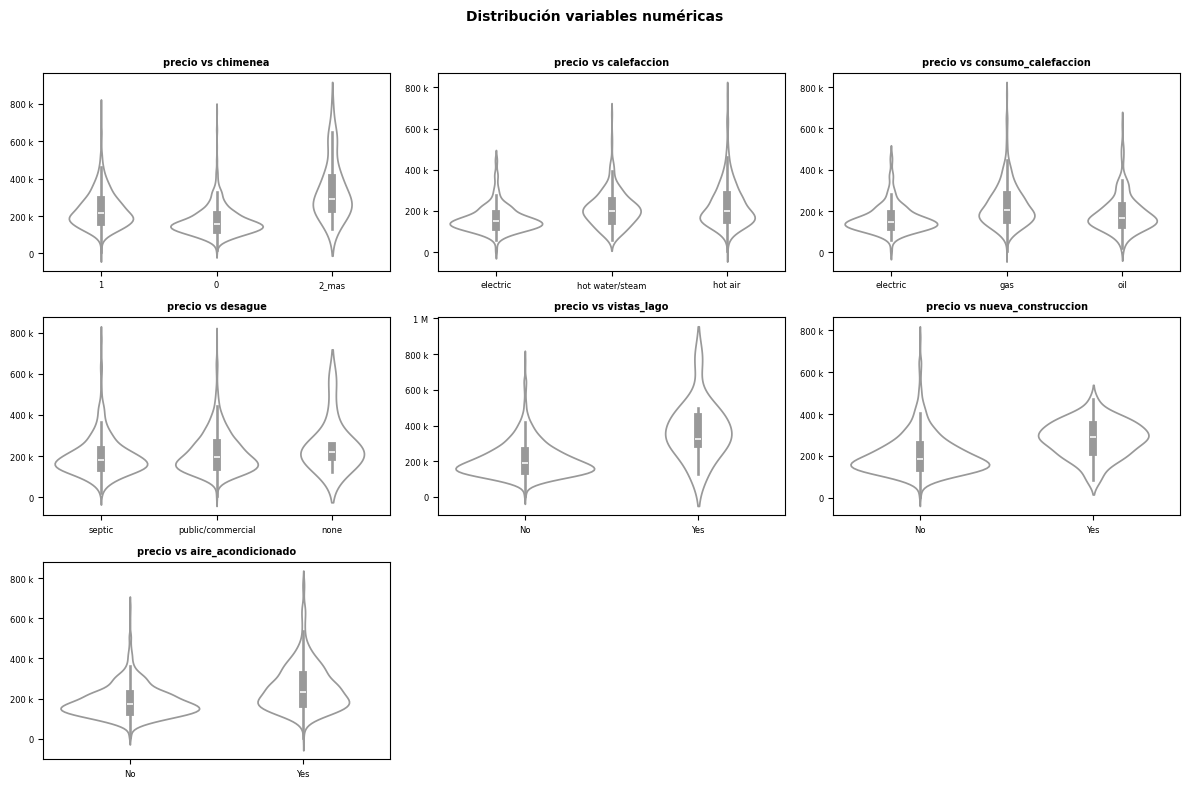

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, column in enumerate(columnas_object):
    sns.violinplot(
        x=column,
        y='precio',
        data=data,
        color='white',
        ax=axes[i]
    )
    axes[i].set_title(f"precio vs {column}", fontsize=7, fontweight='bold')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight='bold')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('precio', axis='columns'),
    data['precio'],
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

In [22]:
title = 'Partición de entrenamiento'
print(title + "\n" + len(title) * '-')
print(y_train.describe())

Partición de entrenamiento
--------------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [23]:
title = 'Partición de test'
print(title + "\n" + len(title) * '-')
print(y_test.describe())

Partición de test
-----------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


In [24]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
    [('scale', StandardScaler(), numeric_cols),
     ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
     remainder='passthrough'
)

In [25]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [26]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
nombre_columnas = np.concatenate([numeric_cols, encoded_cat])
X_train_prep = preprocessor.transform(X_train)
X_train_prep = pd.DataFrame(X_train_prep, columns=nombre_columnas)
X_train_prep.head(8)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefaccion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.121115,0.159766,-0.138022,0.254509,0.730235,-0.200805,-0.610289,-0.895671,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.523186,-0.974885,0.050496,0.484768,0.150688,-0.200805,0.905289,0.832521,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,-0.508295,-0.407560,-0.529339,-1.358921,-0.332268,-1.412649,-0.610289,-0.031575,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0.266065,-0.407560,-0.409373,0.029079,-0.139086,1.011039,0.147500,-0.031575,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,-0.404054,-0.974885,0.233301,-0.864587,0.150688,-0.200805,0.147500,-0.895671,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [27]:
preprocessor = ColumnTransformer(
    [('scale', StandardScaler(), numeric_cols),
     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
     remainder='passthrough',
     verbose_feature_names_out=False
).set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.head(8)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefaccion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1068,-0.121115,0.159766,-0.138022,0.254509,0.730235,-0.200805,-0.610289,-0.895671,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
535,-0.523186,-0.974885,0.050496,0.484768,0.150688,-0.200805,0.905289,0.832521,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
257,-0.508295,-0.407560,-0.529339,-1.358921,-0.332268,-1.412649,-0.610289,-0.031575,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
489,0.266065,-0.407560,-0.409373,0.029079,-0.139086,1.011039,0.147500,-0.031575,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
618,-0.404054,-0.974885,0.233301,-0.864587,0.150688,-0.200805,0.147500,-0.895671,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [31]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
X_train_prep.head(5)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefaccion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1068,-0.121115,0.159766,-0.138022,0.254509,0.730235,-0.200805,-0.610289,-0.895671,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
535,-0.523186,-0.974885,0.050496,0.484768,0.150688,-0.200805,0.905289,0.832521,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
from sklearn import set_config

set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefaccion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])],
                  verbose_feature_names_out=False)

In [34]:
set_config(display='text')